In [20]:
import interfaces as inter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
import numpy as np
nltk.download('wordnet')
nltk.download('stopwords')
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import cv2

[nltk_data] Downloading package wordnet to /home/mikhail/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mikhail/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
file ='hp.txt'

In [22]:
f = open('pipeline.py','w')
f.write('''import interfaces as inter
from mpi4py import MPI
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

N_USE = n_use
N_KEEP = n_keep
N_FINAL_TOP = n_final_top
FILENAME = 'hp'

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
filename = FILENAME + '_0' + str(rank) + '.txt'

inter.pipeline(filename, N_USE, N_KEEP, rank, comm,N_FINAL_TOP,result_suff='_111')'''.replace('n_use',str(10000)).replace('n_keep',str(10000)).replace('n_final_top',str(1000)))
inter.file_to_n_files(file,3)

In [23]:
!mpiexec -n 3 python pipeline.py
words = np.load('result/words_111.txt',allow_pickle=True)
counts = np.load('result/counts_111.txt',allow_pickle=True)

## Word cloud

In [24]:
harry_dict  = {}
for i, word in enumerate(words):
    harry_dict[word] = counts[i]

## Harry Potter

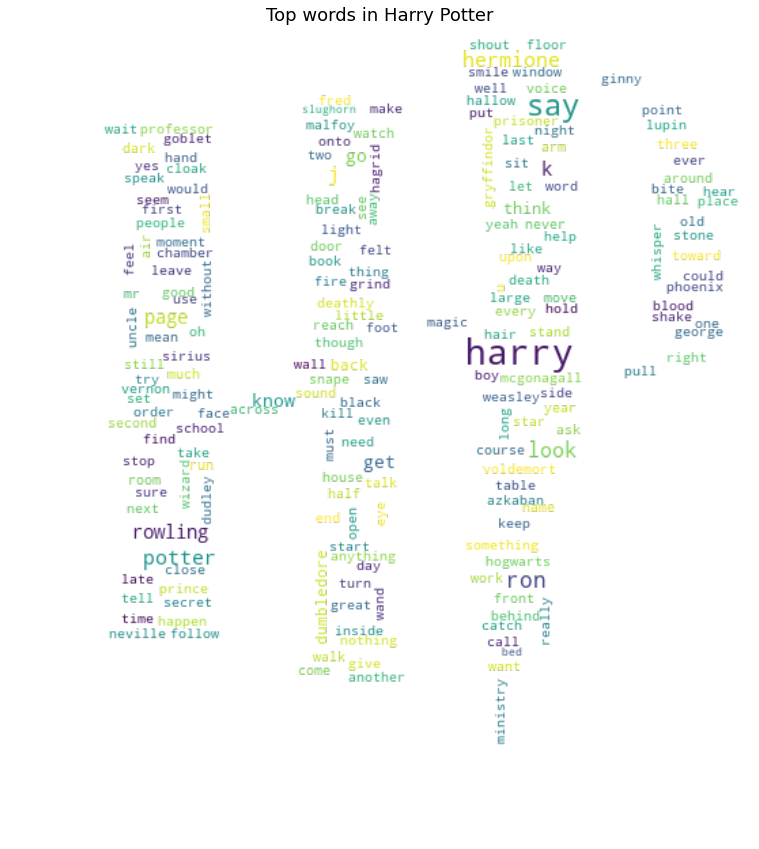

In [25]:
img = np.uint8(cv2.imread('top words/hp.jpg'))
wordcloud = WordCloud(stopwords = {}, mask = img, background_color=None, mode='RGBA').generate_from_frequencies(harry_dict)

f = {'size' : 15}
plt.rc('font', **f)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words in Harry Potter')
plt.axis('off')
plt.savefig('top words/Word Clouds/word_cloud_hp.png')
plt.show()